#NBA Shot Chart
This is a chart showing where shots were taken from as outlined here: http://savvastjortjoglou.com/nba-shot-sharts.html

In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Let's scrape James Harden's shot chart data.  For more information on finding the API and implementing it using the requests package in python, please see [Web Scraping 201: finding the API](http://www.gregreda.com/2015/02/15/web-scraping-finding-the-api/).

We will be looking at the shot data for Kenneth Faried from the Denver Nuggets

In [2]:
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?Period=0&VsCo'\
                'nference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Loc'\
                'ation=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod='\
                '&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Seaso'\
                'n=2014-15&AheadBehind=&PlayerID=202702&EndRange=&VsDivisi'\
                'on=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTim'\
                'e=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID='

In [3]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

Now that we have the data let's create a pandas DataFrame...

In [4]:
shot_df = pd.DataFrame(shots, columns=headers)
shot_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021400011,5,202702,Kenneth Faried,1610612743,Denver Nuggets,1,11,23,...,Tip Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,9,0,1,1
1,Shot Chart Detail,0021400011,8,202702,Kenneth Faried,1610612743,Denver Nuggets,1,10,55,...,Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,6,25,1,1
2,Shot Chart Detail,0021400011,31,202702,Kenneth Faried,1610612743,Denver Nuggets,1,8,10,...,Jump Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-13,34,1,0
3,Shot Chart Detail,0021400011,63,202702,Kenneth Faried,1610612743,Denver Nuggets,1,5,56,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-2,1,1,1
4,Shot Chart Detail,0021400011,218,202702,Kenneth Faried,1610612743,Denver Nuggets,2,4,20,...,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,11,1,1


Let's quickly plot the data to see what it looks like:

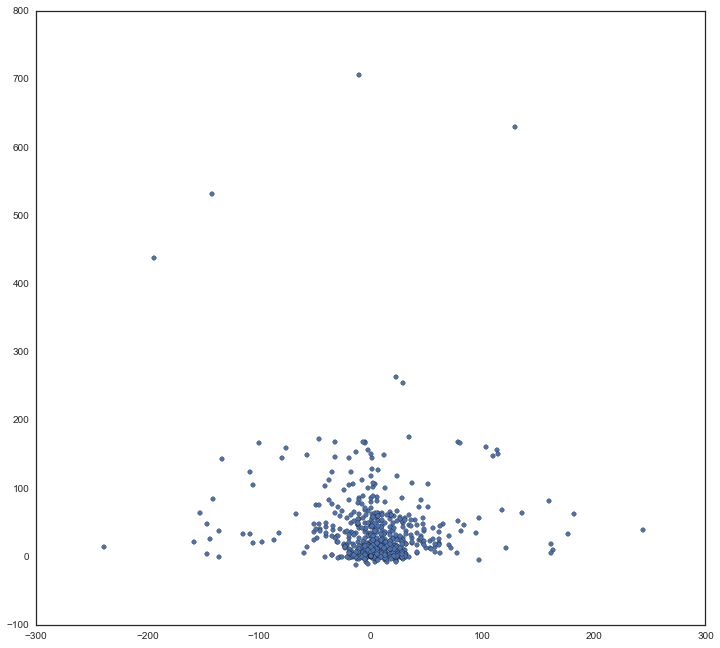

In [5]:
sns.set_style('white')
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

This is misrepresenting the data however, as the x-axis values are the inverse of what they actually should be.

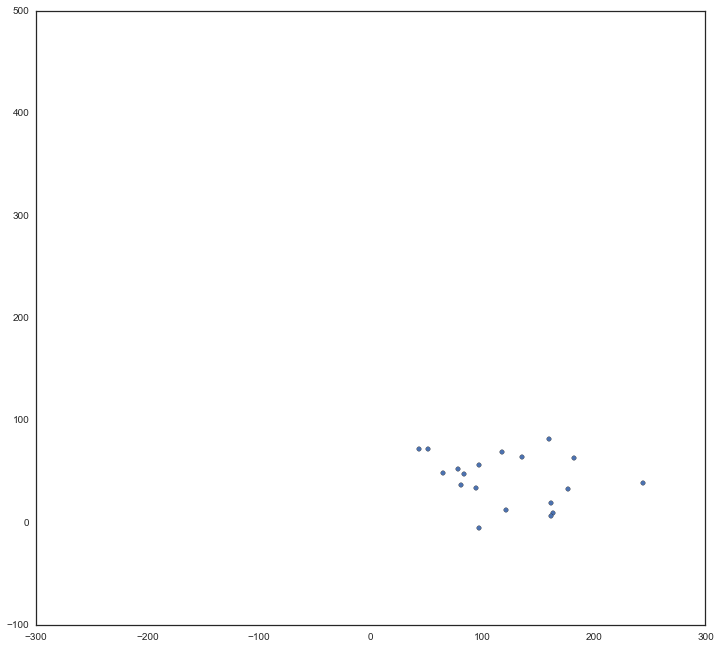

In [6]:
right = shot_df[shot_df.SHOT_ZONE_AREA == 'Right Side(R)']
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

These shots are to the viewers right, but in reality they should be to the right of the hoop instead!  This can be fixed by taking the inverse of the x location or setting the xlimits to go in descending order like so...

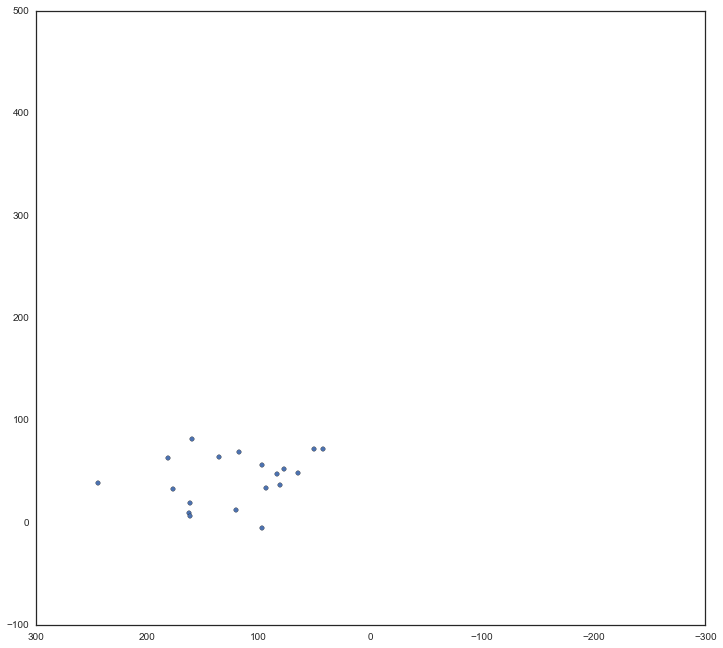

In [7]:
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

##Drawing the Court

In [8]:
from matplotlib.patches import Circle, Rectangle, Arc

# Function to draw the court
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot to, just get current one
    if ax is None:
        ax = plt.gca()
    
    # Create the various parts of the NBA Basketball Court
    
    # Create hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which will be a value
    # of 7.5 in our coordinate system (10 = 12")
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create Backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
    # The Paint
    # Create the outer box (width=16ft, height=19ft)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                         fill=False)
    
    # Create the inner box (width=12ft, height=19ft)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                         fill=False)
    
    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0,142.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, arc with 4ft radius from the center of the hoop
    restricted = Arc((0,0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)
    
    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 395), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 395), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                     bottom_free_throw, restricted, corner_three_a,
                     corner_three_b, three_arc, center_outer_arc,
                     center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline, and side out of bounds lines
        outer_lines = Rectangle((-250, -47.5), 500, 442.5, linewidth=lw,
                               color=color, fill=False)
        court_elements.append(outer_lines)
    
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax

Now lets draw the court and see what we get!

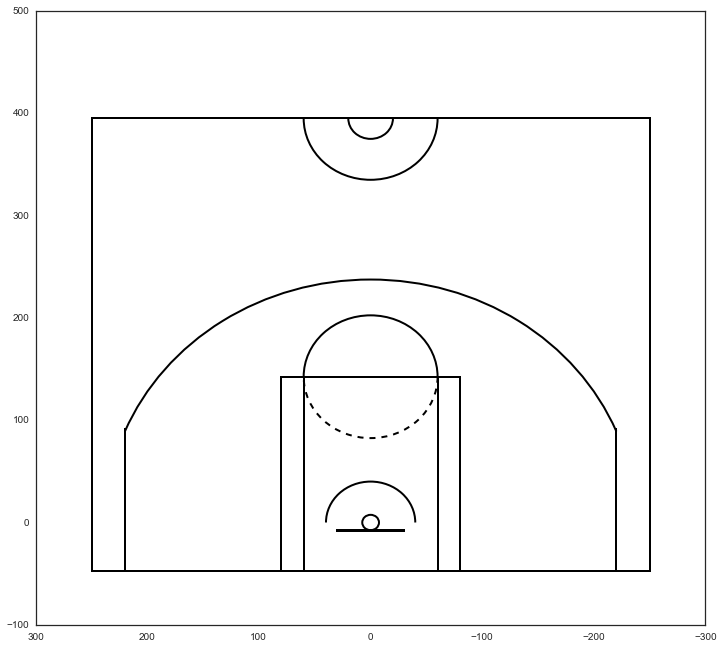

In [9]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(300, -300)
plt.ylim(-100, 500)
plt.show()

## Creating some Shot Charts

For this plot we will invert the y axis to display the chart with the same orientation as is used for shot charts on stats.nba.com.  Because we are inverting the y-axis, we no longer need to invert the xlim...

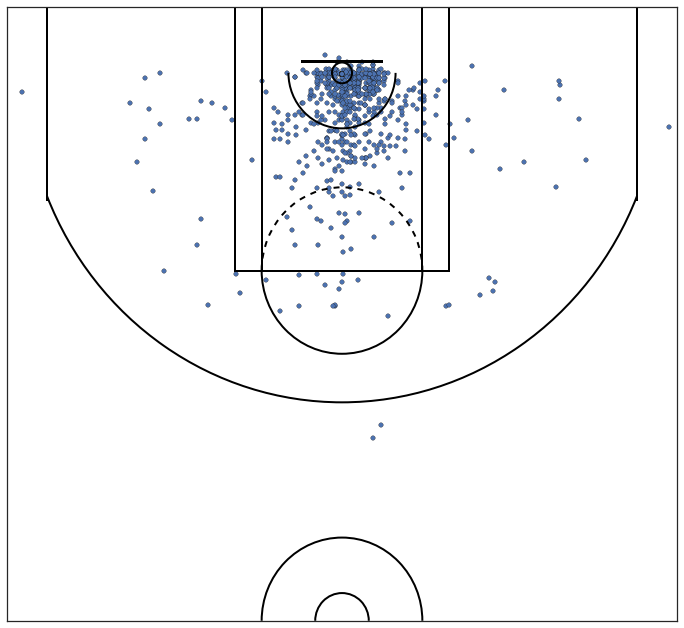

In [10]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along the y axis to put hoop at the top of the plot
plt.ylim(395, -47.5)
# Get rid of axis tick labels
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

This is nice, but let's create a few shot charts using `jointplot` from `seaborn`

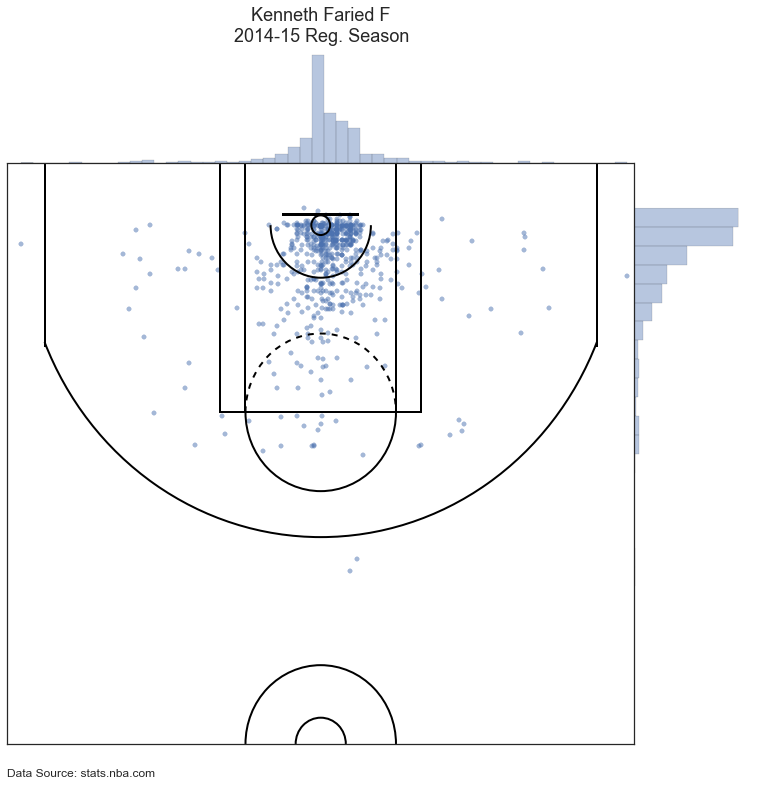

In [11]:
# create our jointplot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation
ax.set_xlim(-250,250)
ax.set_ylim(395, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kenneth Faried F \n2014-15 Reg. Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,420,'Data Source: stats.nba.com', fontsize=12)

plt.show()